# Pandas Cheat Sheet

### Where is Pandas?

Pandas is a python package that can be used for data loading and exploration.  It has a number of powerful features that build on top of NumPy and MatPlotLib.  It's interface is very "R"-esque

### Where do I get Pandas?

The easiest way to install pandas is to install Anaconda.  You can also install it via pip.  You can read more about installation here: https://pandas.pydata.org/

### Pandas basic terminology

* **DataFrame**: A data frame is an operational unit in Pandas.  It represents a group of rows and columns.  You can think of it as a table.
* **Row**: A single row of a data frame table.  This is analogous to an "observation".
* **Column**: A single column of the data frame table.  This is analogous to a "feature".  Columns may have **labels** which you can use to refer to a column or a group of columns.

## Loading data into a DataFrame

Pandas provides a number of ways to load data into data frames.  The simplest is by simply calling DataFrame with a 2D array.

In [1]:
import numpy as np
import pandas as pd

data = np.random.randint(1, 10, (10, 10))
frame = pd.DataFrame(data)

frame

,0,1,2,3,4,5,6,7,8,9
0,4,8,5,8,6,4,5,9,6,5
1,6,8,3,4,6,1,5,5,1,8
2,9,6,6,3,4,7,6,2,6,4
3,1,6,6,6,5,2,3,2,6,9
4,8,6,5,1,4,9,8,4,4,2
5,5,8,3,3,7,7,6,7,1,8
6,9,7,3,1,5,1,9,7,6,2
7,1,5,8,3,4,3,1,8,6,1
8,4,3,1,3,8,2,4,6,2,5
9,2,4,1,6,2,3,2,6,6,9


Printing an entire data frame is fine when we just have a few lines, but if we have hundreds, thousands, millions or more observations, this becomes impractical.  A convenient way to view a small subset of your data is the following:  

In [2]:
print('The head prints the first few rows')
print(frame.head())
print('\nA sample can be taken along either axis')
print(frame.sample(3, axis=0))

The head prints the first few rows
   0  1  2  3  4  5  6  7  8  9
0  4  8  5  8  6  4  5  9  6  5
1  6  8  3  4  6  1  5  5  1  8
2  9  6  6  3  4  7  6  2  6  4
3  1  6  6  6  5  2  3  2  6  9
4  8  6  5  1  4  9  8  4  4  2

A sample can be taken along either axis
   0  1  2  3  4  5  6  7  8  9
9  2  4  1  6  2  3  2  6  6  9
5  5  8  3  3  7  7  6  7  1  8
8  4  3  1  3  8  2  4  6  2  5


This is interesting, but not very practical.  Usually you're getting data from somewhere, not generating random numbers.  Pandas provides a number of `read_*` functions to help you get data into the application.  The most commonly used ones include:
* `read_csv` for importing CSVs
* `read_sql_query` for importing SQL data
* `read_excel` for importing Excel files
* `read_json` for importing JSON data

Let's read in a bunch of data from a SQL DB...

In [3]:
import sqlite3 as sql

data_connection = sql.connect('sample_data.db')
frame = pd.read_sql_query('SELECT * FROM snapshot_update', data_connection)

frame.head()

,id,type,order_id,order_type,size,price,side,client_oid,product_id,sequence,time,remaining_size,funds,trade_id,maker_order_id,taker_order_id,reason
0,1,received,3c26df97-b7a2-49fb-8660-f2befa0c9124,limit,0.030422,16445.75,sell,6fdfe000-000e-4aee-9a00-0000eaee9a00,BTC-USD,4781513761,2018-01-05T20:26:08.319000Z,NaN,NaN,NaN,None,None,None
1,2,open,3c26df97-b7a2-49fb-8660-f2befa0c9124,None,NaN,16445.75,sell,None,BTC-USD,4781513762,2018-01-05T20:26:08.319000Z,0.030422,NaN,NaN,None,None,None
2,3,received,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,limit,0.031263,16246.22,buy,ba23c000-000a-4cd3-ab10-0000acd3eb10,BTC-USD,4781513763,2018-01-05T20:26:08.323000Z,NaN,NaN,NaN,None,None,None
3,4,open,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,None,NaN,16246.22,buy,None,BTC-USD,4781513764,2018-01-05T20:26:08.323000Z,0.031263,NaN,NaN,None,None,None
4,5,received,44d35dd5-c84d-450a-8201-a57ee7385c96,limit,0.010000,16336.00,buy,3b4a0df1-3ece-4de1-a0a7-e9b35ee40a2f,BTC-USD,4781513765,2018-01-05T20:26:08.369000Z,NaN,NaN,NaN,None,None,None


In [4]:
print('Total elements: {}'.format(frame['id'].count()))

Total elements: 437884


Notice that this frame has "labels".  You can reference these columns by their label, or their ordinal position.  You can use `columns` to see what labels are available, and to change those labels.

In [5]:
frame.columns

Index(['id', 'type', 'order_id', 'order_type', 'size', 'price', 'side',
       'client_oid', 'product_id', 'sequence', 'time', 'remaining_size',
       'funds', 'trade_id', 'maker_order_id', 'taker_order_id', 'reason'],
      dtype='object')

In [6]:
frame.columns = ['id', 'event', 'order_id', 'type', 'size', 'price', 'side',
       'client_oid', 'product_id', 'sequence', 'time', 'remaining',
       'funds', 'trade_id', 'maker', 'taker', 'reason']

frame.head()

,id,event,order_id,type,size,price,side,client_oid,product_id,sequence,time,remaining,funds,trade_id,maker,taker,reason
0,1,received,3c26df97-b7a2-49fb-8660-f2befa0c9124,limit,0.030422,16445.75,sell,6fdfe000-000e-4aee-9a00-0000eaee9a00,BTC-USD,4781513761,2018-01-05T20:26:08.319000Z,NaN,NaN,NaN,None,None,None
1,2,open,3c26df97-b7a2-49fb-8660-f2befa0c9124,None,NaN,16445.75,sell,None,BTC-USD,4781513762,2018-01-05T20:26:08.319000Z,0.030422,NaN,NaN,None,None,None
2,3,received,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,limit,0.031263,16246.22,buy,ba23c000-000a-4cd3-ab10-0000acd3eb10,BTC-USD,4781513763,2018-01-05T20:26:08.323000Z,NaN,NaN,NaN,None,None,None
3,4,open,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,None,NaN,16246.22,buy,None,BTC-USD,4781513764,2018-01-05T20:26:08.323000Z,0.031263,NaN,NaN,None,None,None
4,5,received,44d35dd5-c84d-450a-8201-a57ee7385c96,limit,0.010000,16336.00,buy,3b4a0df1-3ece-4de1-a0a7-e9b35ee40a2f,BTC-USD,4781513765,2018-01-05T20:26:08.369000Z,NaN,NaN,NaN,None,None,None


Many of these observations have missing data.  There are a number of ways we can fill in missing data.  For now, we'll fill in all the missing values with 'na'.  We use the `inplace` flag so that we don't need to return a copy of our data frame.

In [7]:
frame.fillna(value='na', inplace=True)

frame.head()

,id,event,order_id,type,size,price,side,client_oid,product_id,sequence,time,remaining,funds,trade_id,maker,taker,reason
0,1,received,3c26df97-b7a2-49fb-8660-f2befa0c9124,limit,0.0304221,16445.8,sell,6fdfe000-000e-4aee-9a00-0000eaee9a00,BTC-USD,4781513761,2018-01-05T20:26:08.319000Z,na,na,na,na,na,na
1,2,open,3c26df97-b7a2-49fb-8660-f2befa0c9124,na,na,16445.8,sell,na,BTC-USD,4781513762,2018-01-05T20:26:08.319000Z,0.0304221,na,na,na,na,na
2,3,received,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,limit,0.0312626,16246.2,buy,ba23c000-000a-4cd3-ab10-0000acd3eb10,BTC-USD,4781513763,2018-01-05T20:26:08.323000Z,na,na,na,na,na,na
3,4,open,6f7596cb-b10c-489b-9a1d-a4004e71a1b4,na,na,16246.2,buy,na,BTC-USD,4781513764,2018-01-05T20:26:08.323000Z,0.0312626,na,na,na,na,na
4,5,received,44d35dd5-c84d-450a-8201-a57ee7385c96,limit,0.01,16336,buy,3b4a0df1-3ece-4de1-a0a7-e9b35ee40a2f,BTC-USD,4781513765,2018-01-05T20:26:08.369000Z,na,na,na,na,na,na


Now that we've removed the missing values, let's see how many of each type of event we have.

In [8]:
for event in frame['event'].unique():
    print('{}: {}'.format(event, frame[frame['event'] == event]['event'].count()))

received: 143827
open: 139983
done: 144133
match: 9940
change: 1


Lots of orders get entered into the book, then subsequently cancelled.  Let's see how many were filled, or stayed open at the end of our window.

In [9]:
canceled = frame[frame['reason'] == 'canceled']['order_id'].tolist()

complete_or_open_orders = frame[~frame['order_id'].isin(canceled)]

len(complete_or_open_orders['order_id'].unique())

14582

Now that we know what orders have a complete or open status, let's see if we can put them together

In [10]:
complete_or_open_orders.sort_values(['order_id', 'id']).head()

,id,event,order_id,type,size,price,side,client_oid,product_id,sequence,time,remaining,funds,trade_id,maker,taker,reason
258609,258610,received,0002aefe-4928-45f7-b9c9-94a898372abf,limit,0.0165,17070.8,buy,na,BTC-USD,4781772370,2018-01-05T21:03:41.695000Z,na,na,na,na,na,na
258611,258612,done,0002aefe-4928-45f7-b9c9-94a898372abf,na,na,17070.8,buy,na,BTC-USD,4781772372,2018-01-05T21:03:41.695000Z,0,na,na,na,na,filled
330143,330144,received,000c05e6-194a-449b-8c65-f384b42e1927,limit,0.0025,17499,sell,ae8189f7-d9fa-4819-cdb1-48787f0a19c7,BTC-USD,4781843904,2018-01-05T21:10:12.917000Z,na,na,na,na,na,na
330144,330145,open,000c05e6-194a-449b-8c65-f384b42e1927,na,na,17499,sell,na,BTC-USD,4781843905,2018-01-05T21:10:12.917000Z,0.0025,na,na,na,na,na
231390,231391,received,000c1248-39c3-4443-a3bd-3c48bd3a2a71,limit,0.024009,16600,buy,na,BTC-USD,4781745151,2018-01-05T21:00:47.883000Z,na,na,na,na,na,na


Now that we have complete and open orders, let's see if we can determine price movement...

Just as a simple cut, let's grab the buys and the price at those buys.

In [11]:
# (don't worry about this, it's a 'magic' command to allow inline plots in Jupyter Notebooks)
%matplotlib inline

min: 16320.0 median: 16726.04 max: 165399.99


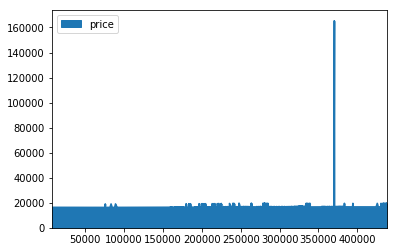

In [12]:
buys = complete_or_open_orders[
    (complete_or_open_orders['event'] == 'done') &
    (complete_or_open_orders['side'] == 'buy') &
    (complete_or_open_orders['price'] != 'na')
][['sequence', 'price']]

buys['price'] = buys['price'].apply(lambda x: float(x))

print('min: {} median: {} max: {}'.format(buys['price'].min(), buys['price'].median(), buys['price'].max()))

buys.plot(y='price', kind='area')

Holy outliers batman!  What the heck is that spike?  Let's see if we can find out...

In [13]:
# Get the offending sequence number
sequence = buys[buys['price'] == 165399.99]['sequence'].iloc[0]

# Use that seqence number to find the offending order
order_id = complete_or_open_orders[complete_or_open_orders['sequence'] == sequence]['order_id'].iloc[0]

# Now let's inspect the order lifecycle
complete_or_open_orders[complete_or_open_orders['order_id'] == order_id][['event', 'type', 'size', 'price', 'sequence', 'time']]

,event,type,size,price,sequence,time
370359,received,limit,0.001,165400,4781884120,2018-01-05T21:14:12.911000Z
370361,done,na,na,165400,4781884122,2018-01-05T21:14:12.911000Z


Wow, looks like someone fat fingered a limit order...ouch!  Let's drop it from our dataset and see what our graph looks like after that.

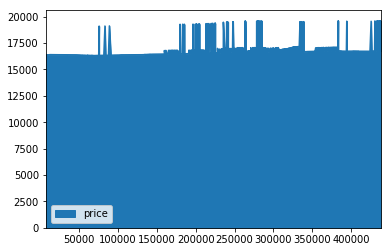

In [14]:
buys = buys[buys['sequence'] != sequence]

buys.plot(y='price', kind='area')